
# Linear Regression

<a target="_blank" href="https://colab.research.google.com/github/intro-stat-learning/ISLP_labs/blob/v2.2/Ch03-linreg-lab.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/intro-stat-learning/ISLP_labs/v2.2?labpath=Ch03-linreg-lab.ipynb)


## Importing packages
We import our standard libraries at this top
level.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots


### New imports
Throughout this lab we will introduce new functions and libraries. However,
we will import them here to emphasize these are the new
code objects in this lab. Keeping imports near the top
of a notebook makes the code more readable, since scanning the first few
lines tells us what libraries are used.

In [ ]:
import statsmodels.api as sm


 We will provide relevant details about the
functions below as they are needed.

Besides importing whole modules, it is also possible
to import only a few items from a given module. This
will help keep the  *namespace* clean.
We will use a few specific objects from the `statsmodels` package
which we import here.

In [ ]:
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm


As one of the import statements above is quite a long line, we inserted a line break `\` to
ease readability.

We will also use some functions written for the labs in this book in the `ISLP`
package.

In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8dda39cf8a93748cc191f0471da724ba9a232fe63eb96ac2d124a16b1b467521
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [ ]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)


### Inspecting Objects and Namespaces
The
function  `dir()`
provides a list of
objects in a namespace.

In [ ]:
dir()


['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

 This shows you everything that `Python` can find at the top level.
There are certain objects like `__builtins__` that contain references to built-in
functions like `print()`.

Every python object has its own notion of
namespace, also accessible with `dir()`. This will include
both the attributes of the object
as well as any methods associated with it. For instance, we see `'sum'` in the listing for an
array.

In [ ]:
A = np.array([3,5,11])
dir(A)


['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


 This indicates that the object `A.sum` exists. In this case it is a method
that can be used to compute the sum of the array `A` as can be seen by typing `A.sum?`.

In [ ]:
A.sum()


np.int64(19)

## Simple Linear Regression
In this section we will  construct model
matrices (also called design matrices) using the `ModelSpec()`  transform from `ISLP.models`.

We  will use the `Boston` housing data set, which is contained in the `ISLP` package.  The `Boston` dataset records  `medv`  (median house value) for $506$ neighborhoods
around Boston.  We will build a regression model to predict  `medv`  using $13$
predictors such as  `rmvar`  (average number of rooms per house),
 `age`  (proportion of owner-occupied units built prior to 1940), and  `lstat`  (percent of
households with low socioeconomic status).  We will use `statsmodels` for this
task, a `Python` package that implements several commonly used
regression methods.

We have included a simple loading function `load_data()` in the
`ISLP` package:

In [ ]:
Boston = load_data("Boston")
Boston.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

Type Boston? to find out more about these data.

In [ ]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


We start by using the sm.OLS() function to fit a simple linear regression model. Our response will be medv and lstat will be the single predictor. For this model, we can create the model matrix by hand.

In [ ]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]), #Boston.shape[0]: đếm có bao nhiêu dòng dữ liệu trong bảng Boston
                  'lstat': Boston['lstat']}) #lấy cột lstat trong dữ liệu Boston
X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


We extract the response, and fit the model.

In [ ]:
y = Boston['medv']
model = sm.OLS(y, X) #sm statsmodels.api.
results = model.fit() # ước lượng mô hình (tính toán ra β₀, β₁ sao cho sai số nhỏ nhất).

Note that `sm.OLS()` does
not fit the model; it specifies the model, and then `model.fit()` does the actual fitting.  

Our `ISLP` function `summarize()` produces a simple table of the parameter estimates,
their standard errors, t-statistics and p-values.
The function takes a single argument, such as the object `results`
returned here by the `fit`
method, and returns such a summary.

In [ ]:
summarize(results)


,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


Before we describe other methods for working with fitted models, we outline a more useful and general framework for constructing a model matrix~`X`.
### Using Transformations: Fit and Transform
Our model above has a single predictor, and constructing `X` was straightforward.
In practice  we often fit models with more than one predictor, typically selected from an array or data frame.
We may wish to introduce transformations to the variables before fitting the model, specify interactions between variables, and expand some particular variables into sets of variables (e.g. polynomials).
The `sklearn`  package has a particular notion
for this type of task: a *transform*. A transform is an object
that is created with some parameters as arguments. The
object has two main methods: `fit()` and `transform()`.

We provide a general approach for specifying models and constructing
the model matrix through the transform `ModelSpec()` in the `ISLP` library.
`ModelSpec()`
(renamed `MS()` in the preamble) creates a
transform object, and then a pair of methods
`transform()` and `fit()` are used to construct a
corresponding model matrix.

We first describe this process for our simple regression model  using a single predictor `lstat` in
the `Boston` data frame, but will use it repeatedly in more
complex tasks in this and other labs in this book.
In our case the transform is created by the expression
`design = MS(['lstat'])`.

The `fit()`  method takes the original array and may do some
initial computations on it, as specified in the transform object.
For example, it may compute means and standard deviations for centering and scaling.
The `transform()`
method applies the fitted transformation to the array of data, and produces the model matrix.


In [ ]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In this simple case, the `fit()`  method does very little; it simply checks that the variable `'lstat'` specified in `design` exists in `Boston`. Then `transform()` constructs the model matrix with two columns: an `intercept` and the variable `lstat`.

These two operations can be  combined with the
`fit_transform()`  method.

In [ ]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


Note that, as in the previous code chunk when the two steps were done separately, the `design` object is changed as a result of the `fit()` operation. The power of this pipeline will become clearer when we fit more complex models that involve interactions and transformations.

Let's return to our fitted regression model.
The object
`results` has several methods that can be used for inference.
We already presented a function `summarize()` for showing the essentials of the fit.
For a full and somewhat exhaustive summary of the fit, we can use the `summary()`
method.

In [ ]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 27 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        01:20:08   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The fitted coefficients can also be retrieved as the
`params` attribute of `results`.

In [ ]:
results.params


,0
intercept,34.553841
lstat,-0.950049


The `get_prediction()`  method can be used to obtain predictions, and produce confidence intervals and
prediction intervals for the prediction of  `medv`  for  given values of  `lstat`.

We first create a new data frame, in this case containing only the variable `lstat`, with the values for this variable at which we wish to make predictions.
We then use the `transform()` method of `design` to create the corresponding model matrix.

In [ ]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX


,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


Next we compute the predictions at `newX`, and view them by extracting the `predicted_mean` attribute.

In [ ]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean


array([29.80359411, 25.05334734, 20.30310057])

We can produce confidence intervals for the predicted values.

In [ ]:
new_predictions.conf_int(alpha=0.05)


array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

Prediction intervals are computing by setting `obs=True`:

In [ ]:
new_predictions.conf_int(obs=True, alpha=0.05)


array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

 For instance, the 95% confidence interval associated with an
 `lstat`  value of 10 is (24.47, 25.63), and the 95% prediction
interval is (12.82, 37.28).  As expected, the confidence and
prediction intervals are centered around the same point (a predicted
value of 25.05 for  `medv`  when  `lstat`  equals
10), but the latter are substantially wider.

Next we will plot  `medv`  and  `lstat`
using `DataFrame.plot.scatter()`, \definelongblankMR{plot.scatter()}{plot.slashslashscatter()}
and wish to
add the regression line to the resulting plot.

### Defining Functions
While there is a function
within the `ISLP` package that adds a line to an existing plot, we take this opportunity
to define our first function to do so.

In [ ]:
results.params

,0
intercept,34.553841
lstat,-0.950049


In [ ]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)


 A few things are illustrated above. First we see the syntax for defining a function:
`def funcname(...)`. The function has arguments `ax, b, m`
where `ax` is an axis object for an exisiting plot, `b` is the intercept and
`m` is the slope of the desired line. Other plotting  options can be passed on to
`ax.plot` by including additional optional arguments as follows:

In [ ]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


The addition of `*args` allows any number of
non-named arguments to `abline`, while `*kwargs` allows any
number of named arguments (such as `linewidth=3`) to `abline`.
In our function, we pass
these arguments verbatim to `ax.plot` above. Readers
interested in learning more about
functions are referred to the section on
defining functions in [docs.python.org/tutorial](https://docs.python.org/3/tutorial/controlflow.html#defining-functions).

Let’s use our new function to add this regression line to a plot of
`medv` vs. `lstat`.

/tmp/ipython-input-1591428221.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
/tmp/ipython-input-1591428221.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


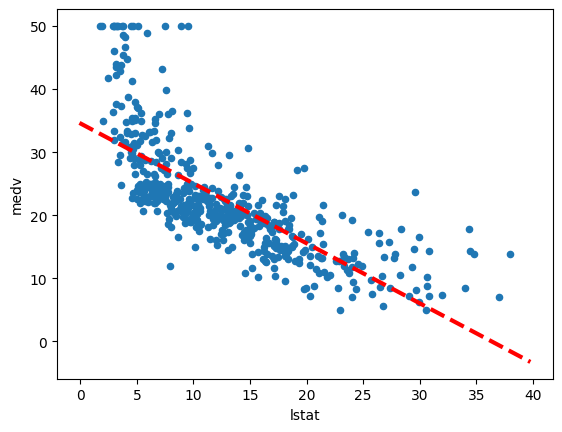

In [ ]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)


Thus, the final call to `ax.plot()` is `ax.plot(xlim, ylim, 'r--', linewidth=3)`.
We have used the argument `'r--'` to produce a red dashed line, and added
an argument to make it of width 3.
There is some evidence for non-linearity in the relationship between  `lstat`  and  `medv`. We will explore this issue later in this lab.

As mentioned above, there is an existing function to add a line to a plot --- `ax.axline()` --- but knowing how to write such functions empowers us to create more expressive displays.



Next we examine some diagnostic plots, several of which were discussed
in Section~\ref{Ch3:problems.sec}.
We can find the fitted values and residuals
of the fit as attributes of the `results` object.
Various influence measures describing the regression model
are computed with the `get_influence()` method.
As we will not use the `fig` component returned
as the first value from `subplots()`, we simply
capture the second returned value in `ax` below.

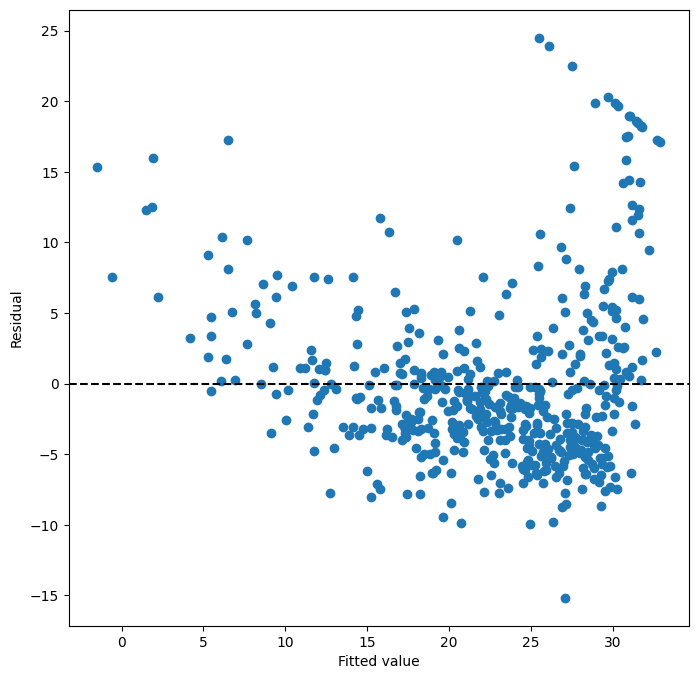

In [ ]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');


 We add a horizontal line at 0 for reference using the
 `ax.axhline()`   method, indicating
it should be black (`c='k'`) and have a dashed linestyle (`ls='--'`).

On the basis of the residual plot, there is some evidence of non-linearity.
Leverage statistics can be computed for any number of predictors using the
`hat_matrix_diag` attribute of the value returned by the
`get_influence()`  method.